In [ ]:

import os
from google.colab import drive

import tensorflow as tf
from tensorflow import keras
import numpy as np

from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers




data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.1),
        ]
    )

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#For fire and no fire training files
#0.8 for training and 0.2 for validation 

In [ ]:
##This indicate it will be done for training files
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Pre-Render/Train", validation_split=0.2, subset="training", seed=1337,batch_size=32,image_size=(254,254), shuffle=True)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Pre-Render/Train", validation_split=0.2, subset="validation", seed=1337,image_size=(254,254),
        batch_size=32, shuffle=True)

Found 40723 files belonging to 2 classes.
Using 32579 files for training.
Found 40723 files belonging to 2 classes.
Using 8144 files for validation.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(254, 254, 3))

In [ ]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [ ]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(1, activation='sigmoid', name='output')(x)  # 4 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0   

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit(train_ds,steps_per_epoch=10,
                              epochs = 15,
                              validation_data=val_ds,
                              batch_size=32,verbose = 1)

Epoch 1/15
10/10 [==============================] - 1212s 134s/step - loss: 0.7893 - acc: 0.7871 - val_loss: 0.3197 - val_acc: 0.9455
Epoch 2/15
10/10 [==============================] - 60s 7s/step - loss: 0.2667 - acc: 0.9312 - val_loss: 0.1717 - val_acc: 0.9688
Epoch 3/15
10/10 [==============================] - 138s 14s/step - loss: 0.3999 - acc: 0.9443 - val_loss: 0.1331 - val_acc: 0.9700
Epoch 4/15
10/10 [==============================] - 138s 14s/step - loss: 0.0928 - acc: 0.9840 - val_loss: 0.1883 - val_acc: 0.9653
Epoch 5/15
10/10 [==============================] - 138s 14s/step - loss: 0.0484 - acc: 0.9915 - val_loss: 0.1018 - val_acc: 0.9724
Epoch 6/15
10/10 [==============================] - 138s 14s/step - loss: 0.1648 - acc: 0.9579 - val_loss: 0.0904 - val_acc: 0.9792
Epoch 7/15
10/10 [==============================] - 137s 14s/step - loss: 0.1420 - acc: 0.9743 - val_loss: 0.0423 - val_acc: 0.9894
Epoch 8/15
10/10 [==============================] - 141s 15s/step - loss: 0.

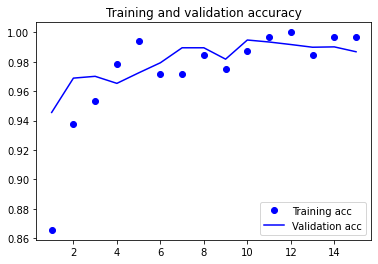

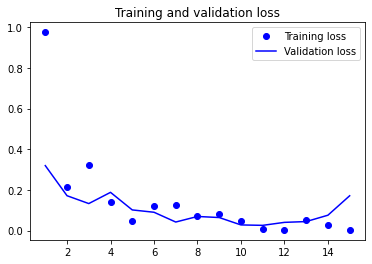

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Next two line of Disaster Averted
test_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Pre-Render/Test", seed=1337, image_size=(254,254), batch_size=32, shuffle=True)


Found 8619 files belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_fire_ds)
print("Accuracy", accuracy)

270/270 [==============================] - 2221s 8s/step - loss: 3.5673 - acc: 0.7256
Accuracy 0.7256062030792236
